In [2]:
import io
import requests
from PIL import Image
import torch
import numpy

from transformers import DetrFeatureExtractor, DetrForSegmentation
from transformers.models.detr.feature_extraction_detr import rgb_to_id

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50-panoptic")
model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

# prepare image for the model
inputs = feature_extractor(images=image, return_tensors="pt")

# forward pass
outputs = model(**inputs)

# use the `post_process_panoptic` method of `DetrFeatureExtractor` to convert to COCO format
processed_sizes = torch.as_tensor(inputs["pixel_values"].shape[-2:]).unsqueeze(0)
result = feature_extractor.post_process_panoptic(outputs, processed_sizes)[0]

# the segmentation is stored in a special-format png
panoptic_seg = Image.open(io.BytesIO(result["png_string"]))
panoptic_seg = numpy.array(panoptic_seg, dtype=numpy.uint8)
# retrieve the ids corresponding to each mask
panoptic_seg_id = rgb_to_id(panoptic_seg)


c:\Users\elpulpo\Documents\Projects\COURS SIMPLON\ImageSegmentationTest\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\elpulpo\Documents\Projects\COURS SIMPLON\ImageSegmentationTest\.venv\Lib\site-packages\transformers\models\detr\feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'd

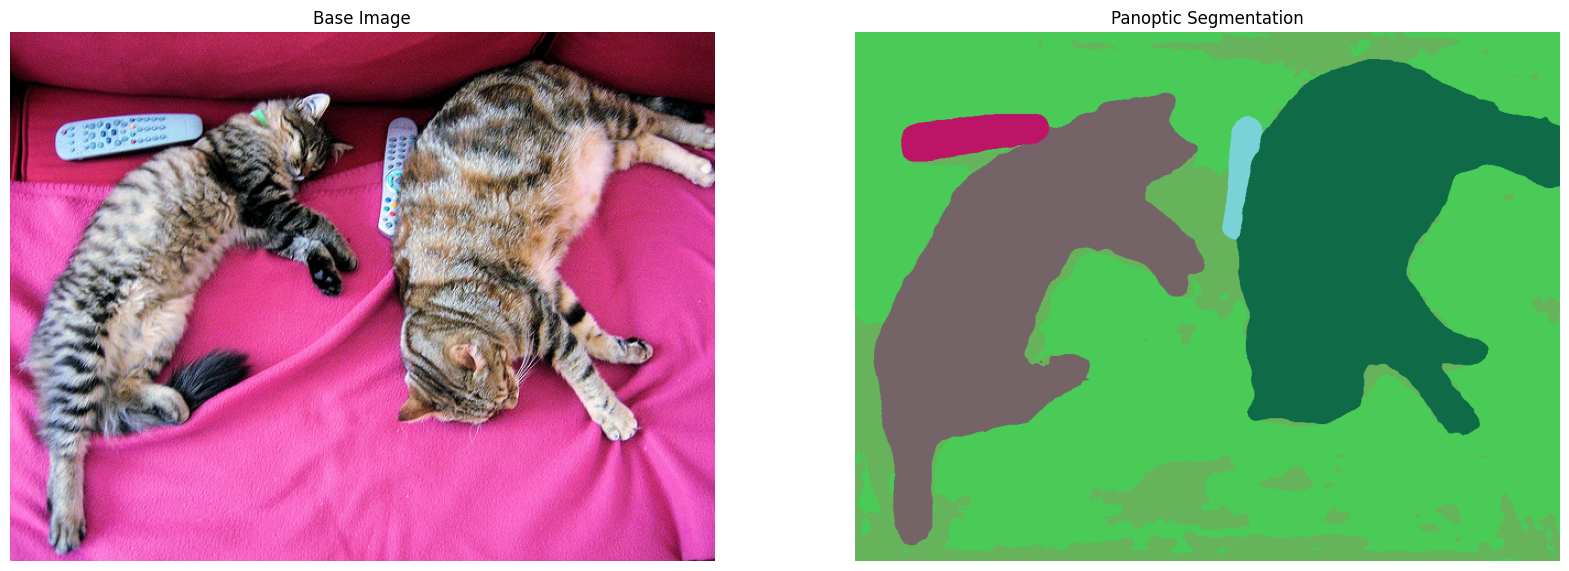

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a colorized image for the segmentation:
unique_ids = np.unique(panoptic_seg_id)
np.random.seed(42)  # For reproducibility
colors = {id: np.random.randint(0, 255, 3) for id in unique_ids}

# Create a colorized segmentation image
color_seg = np.zeros((panoptic_seg_id.shape[0], panoptic_seg_id.shape[1], 3), dtype=np.uint8)
for id in unique_ids:
    color_seg[panoptic_seg_id == id] = colors[id]

# Display side by side using subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Display the base image
ax[0].imshow(image)
ax[0].set_title("Base Image")
ax[0].axis('off')

# Display the colorized segmentation
ax[1].imshow(color_seg)
ax[1].set_title("Panoptic Segmentation")
ax[1].axis('off')

plt.show()
